In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Pandas Data Structures: Series

In [2]:
names = ['Mercury', 'Venus', 'Earth']
values = [0.3e24, 4.87e24, 5.97e24]
masses = pd.Series(values, index = names)

In [3]:
masses

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
dtype: float64

In [4]:
type(masses)

pandas.core.series.Series

<AxesSubplot:>

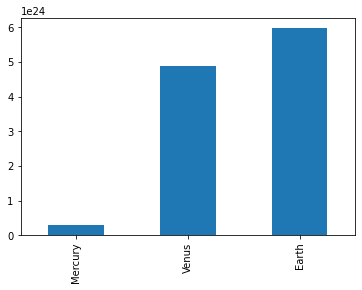

In [5]:
masses.plot(kind='bar')

In [6]:
np.log(masses)/masses**2

Mercury    6.006452e-46
Venus      2.396820e-48
Earth      1.600655e-48
dtype: float64

In [7]:
masses.index

Index(['Mercury', 'Venus', 'Earth'], dtype='object')

### Indexing

In [8]:
masses.loc['Earth']

5.97e+24

In [9]:
masses.iloc[2]

5.97e+24

In [10]:
masses.loc[['Venus', 'Earth']]

Venus    4.870000e+24
Earth    5.970000e+24
dtype: float64

In [11]:
masses.loc['Mercury':'Earth']

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
dtype: float64

In [12]:
type(masses.values)

numpy.ndarray

In [13]:
type(masses.index)

pandas.core.indexes.base.Index

### Pandas Data Structures: DataFrame

In [16]:
data = {'mass': [0.3e24, 4.87e24, 5.97e24],
       'diameter': [4879e3, 12_104e3, 12_756e3],
       'rotation_period': [1408.6, np.nan, 23.9]}

In [17]:
data

{'mass': [3e+23, 4.87e+24, 5.97e+24],
 'diameter': [4879000.0, 12104000.0, 12756000.0],
 'rotation_period': [1408.6, nan, 23.9]}

In [18]:
data['mass']

[3e+23, 4.87e+24, 5.97e+24]

In [19]:
df = pd.DataFrame(data, index = ['Mercury', 'Venus', 'Earth'])

In [20]:
df

,mass,diameter,rotation_period
Mercury,3.000000e+23,4879000.0,1408.6
Venus,4.870000e+24,12104000.0,NaN
Earth,5.970000e+24,12756000.0,23.9


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Mercury to Earth
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mass             3 non-null      float64
 1   diameter         3 non-null      float64
 2   rotation_period  2 non-null      float64
dtypes: float64(3)
memory usage: 96.0+ bytes


In [22]:
df.min()

mass               3.000000e+23
diameter           4.879000e+06
rotation_period    2.390000e+01
dtype: float64

In [23]:
df.mean()

mass               3.713333e+24
diameter           9.913000e+06
rotation_period    7.162500e+02
dtype: float64

In [24]:
df.describe()

,mass,diameter,rotation_period
count,3.000000e+00,3.000000e+00,2.00000
mean,3.713333e+24,9.913000e+06,716.25000
std,3.006765e+24,4.371744e+06,979.13076
min,3.000000e+23,4.879000e+06,23.90000
25%,2.585000e+24,8.491500e+06,370.07500
50%,4.870000e+24,1.210400e+07,716.25000
75%,5.420000e+24,1.243000e+07,1062.42500
max,5.970000e+24,1.275600e+07,1408.60000


In [25]:
df['mass']

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
Name: mass, dtype: float64

In [26]:
df.loc['Earth', 'mass']

5.97e+24

In [27]:
df.iloc[2]

mass               5.970000e+24
diameter           1.275600e+07
rotation_period    2.390000e+01
Name: Earth, dtype: float64

In [28]:
df.iloc[:2, 0]

Mercury    3.000000e+23
Venus      4.870000e+24
Name: mass, dtype: float64

In [29]:
df

,mass,diameter,rotation_period
Mercury,3.000000e+23,4879000.0,1408.6
Venus,4.870000e+24,12104000.0,NaN
Earth,5.970000e+24,12756000.0,23.9


In [30]:
volume = 4/3 * np.pi * (df.diameter/2)**3

In [31]:
volume

Mercury    6.081225e+19
Venus      9.285074e+20
Earth      1.086781e+21
Name: diameter, dtype: float64

In [32]:
df.mass/volume

Mercury    4933.216530
Venus      5244.977070
Earth      5493.285577
dtype: float64

In [33]:
df['density'] = df.mass/volume

In [34]:
df

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1408.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577


### Merging Data

In [35]:
temperature = pd.Series([167, 464, 15, -65],
                       index = ['Mercury', 'Venus', 'Earth', 'Mars'],
                       name = 'temperature')

In [36]:
temperature

Mercury    167
Venus      464
Earth       15
Mars       -65
Name: temperature, dtype: int64

In [37]:
df

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1408.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577


In [38]:
df.join(temperature, how='right')

,mass,diameter,rotation_period,density,temperature
Mercury,3.000000e+23,4879000.0,1408.6,4933.216530,167
Venus,4.870000e+24,12104000.0,NaN,5244.977070,464
Earth,5.970000e+24,12756000.0,23.9,5493.285577,15
Mars,NaN,NaN,NaN,NaN,-65


In [39]:
df.join?

Signature: df.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False) -> 'DataFrame'
Docstring:
Join columns of another DataFrame.

Join columns with `other` DataFrame either on index or on a key
column. Efficiently join multiple DataFrame objects by index at once by
passing a list.

Parameters
----------
other : DataFrame, Series, or list of DataFrame
    Index should be similar to one of the columns in this one. If a
    Series is passed, its name attribute must be set, and that will be
    used as the column name in the resulting joined DataFrame.
on : str, list of str, or array-like, optional
    Column or index level name(s) in the caller to join on the index
    in `other`, otherwise joins index-on-index. If multiple
    values given, the `other` DataFrame must have a MultiIndex. Can
    pass an array as the join key if it is not already contained in
    the calling DataFrame. Like an Excel VLOOKUP operation.
how : {'left', 'right', 'outer', 'inner'}, default 'left'


In [40]:
df

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1408.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577


In [41]:
everyone = df.reindex(['Mercury', 'Venus', 'Earth', 'Mars'])

In [42]:
everyone

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1408.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577
Mars,NaN,NaN,NaN,NaN


In [43]:
everyone = df.join(temperature, how = 'right')

In [44]:
everyone

,mass,diameter,rotation_period,density,temperature
Mercury,3.000000e+23,4879000.0,1408.6,4933.216530,167
Venus,4.870000e+24,12104000.0,NaN,5244.977070,464
Earth,5.970000e+24,12756000.0,23.9,5493.285577,15
Mars,NaN,NaN,NaN,NaN,-65


In [45]:
adults = everyone[everyone.mass > 4e24]
adults

,mass,diameter,rotation_period,density,temperature
Venus,4.870000e+24,12104000.0,NaN,5244.977070,464
Earth,5.970000e+24,12756000.0,23.9,5493.285577,15


In [46]:
everyone['is_big'] = df.mass > 4e24
everyone

,mass,diameter,rotation_period,density,temperature,is_big
Mercury,3.000000e+23,4879000.0,1408.6,4933.216530,167,False
Venus,4.870000e+24,12104000.0,NaN,5244.977070,464,True
Earth,5.970000e+24,12756000.0,23.9,5493.285577,15,True
Mars,NaN,NaN,NaN,NaN,-65,NaN


### Modifying Values

In [47]:
df

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1408.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577


In [48]:
df.loc['Earth', 'mass'] = 5.98+24

In [49]:
df

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1408.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,2.998000e+01,12756000.0,23.9,5493.285577


In [50]:
df.loc['Venus', 'diameter'] += 1

In [51]:
df

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1408.6,4933.216530
Venus,4.870000e+24,12104001.0,NaN,5244.977070
Earth,2.998000e+01,12756000.0,23.9,5493.285577


### Plotting

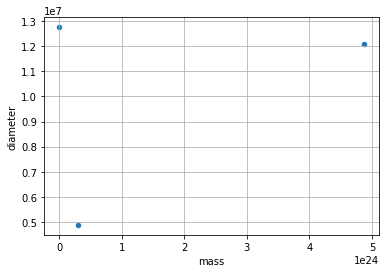

In [52]:
df.plot(kind = 'scatter', x = 'mass', y = 'diameter', grid = True);

<AxesSubplot:>

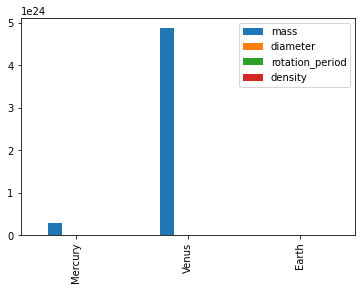

In [53]:
df.plot(kind ='bar')

### Time Indices

In [18]:
two_years = pd.date_range(start = '2014-01-01', end = '2015-12-31', freq = 'D')
timeseries

0      1.721336e-02
1      3.442161e-02
2      5.161967e-02
3      6.880243e-02
4      8.596480e-02
           ...     
725   -6.880243e-02
726   -5.161967e-02
727   -3.442161e-02
728   -1.721336e-02
729    6.432491e-16
Length: 730, dtype: float64

In [12]:
type(two_years)

pandas.core.indexes.datetimes.DatetimeIndex

In [11]:
len(two_years)

730

<AxesSubplot:>

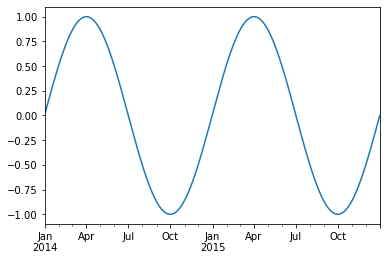

In [19]:
timeseries = pd.Series(np.sin(2 * np.pi * two_years.dayofyear / 365), index = two_years)
timeseries.plot()

In [20]:
timeseries.head()

2014-01-01    0.017213
2014-01-02    0.034422
2014-01-03    0.051620
2014-01-04    0.068802
2014-01-05    0.085965
Freq: D, dtype: float64

<AxesSubplot:>

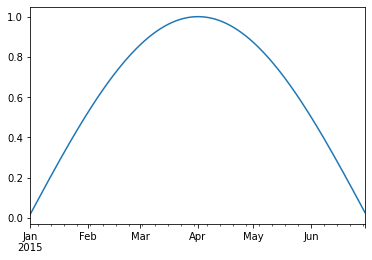

In [22]:
timeseries.loc['2015-01-01':'2015-06-30'].plot()

In [24]:
timeseries.head()

2014-01-01    0.017213
2014-01-02    0.034422
2014-01-03    0.051620
2014-01-04    0.068802
2014-01-05    0.085965
Freq: D, dtype: float64

In [25]:
timeseries.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=730, freq='D')

In [27]:
type(timeseries.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [64]:
timeseries.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
           dtype='int64', length=731)

In [26]:
type(timeseries.index.month)

pandas.core.indexes.numeric.Int64Index

In [28]:
timeseries.index.dayofweek

Int64Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
            ...
            1, 2, 3, 4, 5, 6, 0, 1, 2, 3],
           dtype='int64', length=730)

In [30]:
timeseries.index.day_name()

Index(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday'],
      dtype='object', length=730)

In [31]:
timeseries.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', length=730)

### Reading Data Files: Weather Station Data

In [2]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    base_url="doi:10.5281/zenodo.5564850/",
    registry={
        "data.txt": "md5:5129dcfd19300eb8d4d8d1673fcfbcb4",
    },
)
datafile = POOCH.fetch("data.txt")
datafile

ValueError: Unrecognized URL protocol 'doi' in 'doi:10.5281/zenodo.5564850/data.txt'. Must be one of dict_keys(['ftp', 'https', 'http', 'sftp']).

### Quick Statistics

### Plotting Values

### Resampling